In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train_df =pd.read_csv('/content/train_LZdllcl.csv')
print(train_df.head())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1 

In [27]:
train_df.info()
print(train_df.describe())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
        emplo


Generating visualizations for the training data...


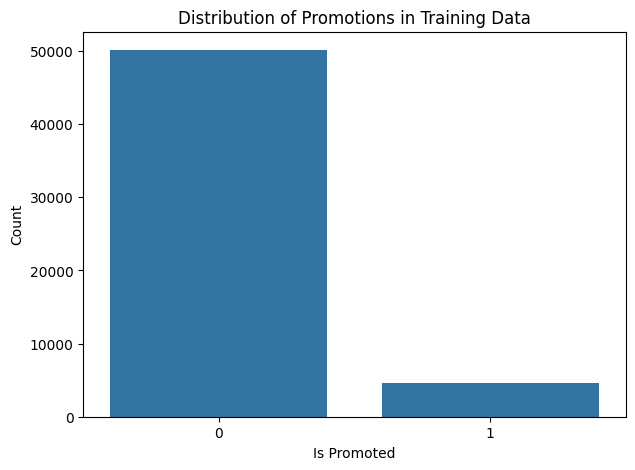

In [28]:
print("\nGenerating visualizations for the training data...")
plt.figure(figsize=(7, 5))
sns.countplot(x='is_promoted', data=train_df)
plt.title('Distribution of Promotions in Training Data')
plt.xlabel('Is Promoted')
plt.ylabel('Count')
plt.show()

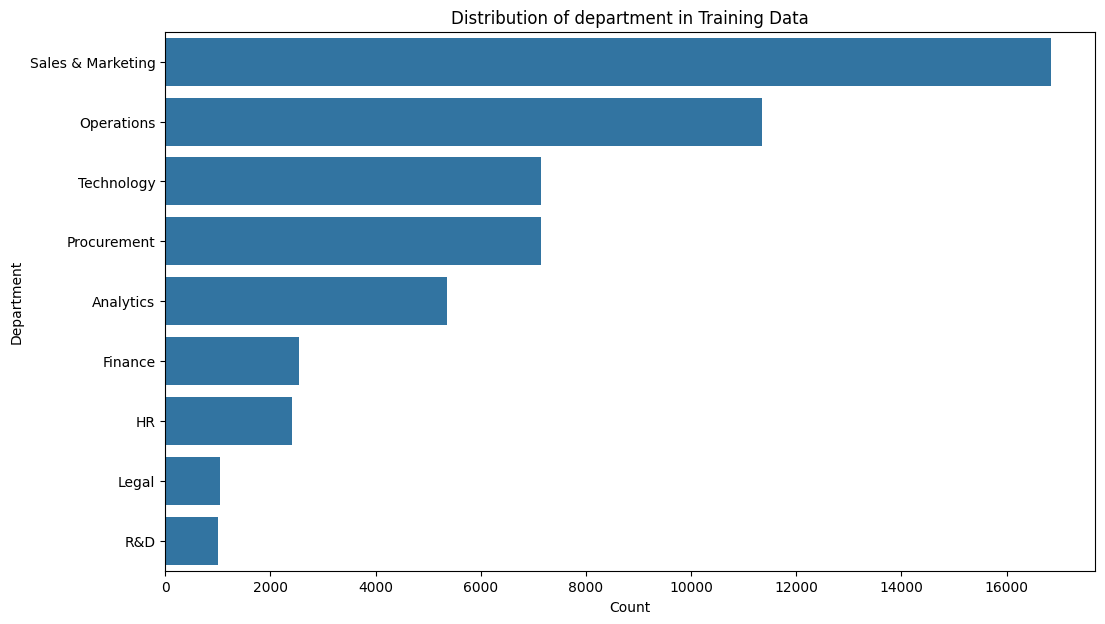

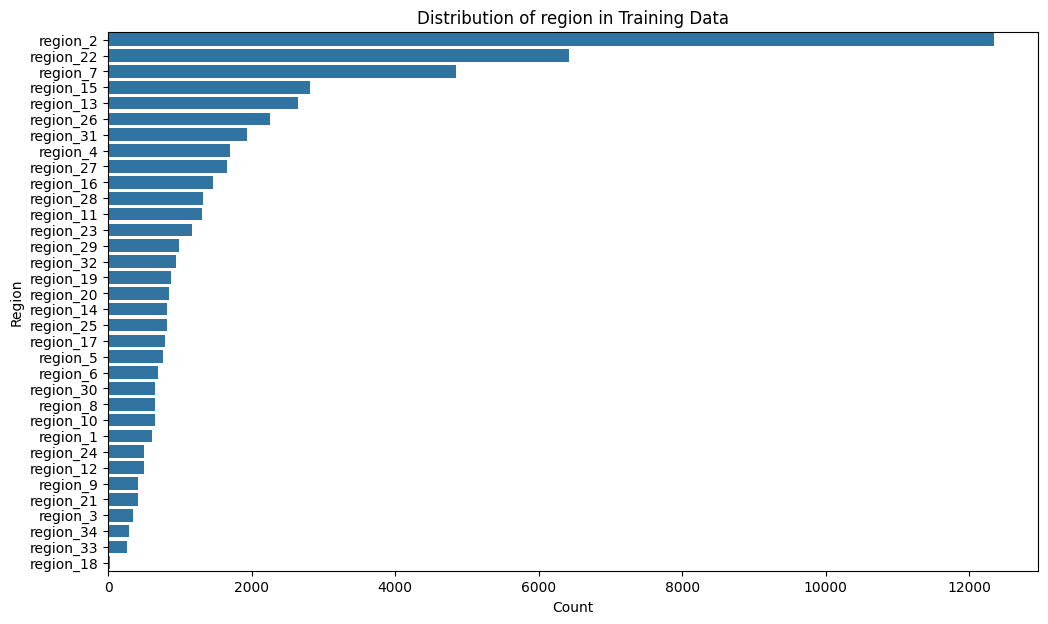

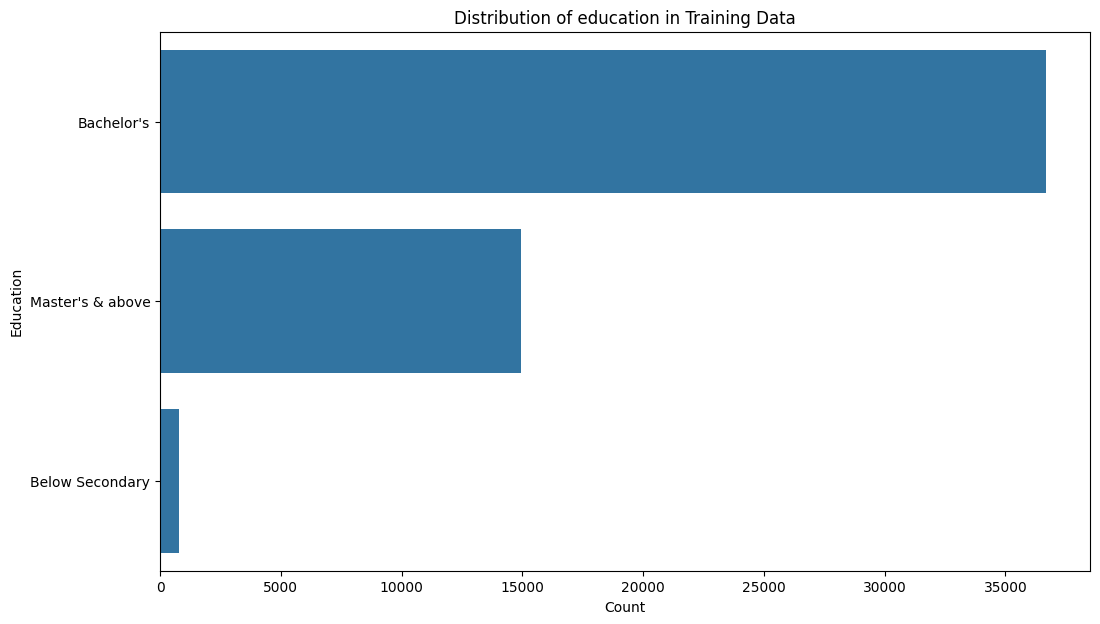

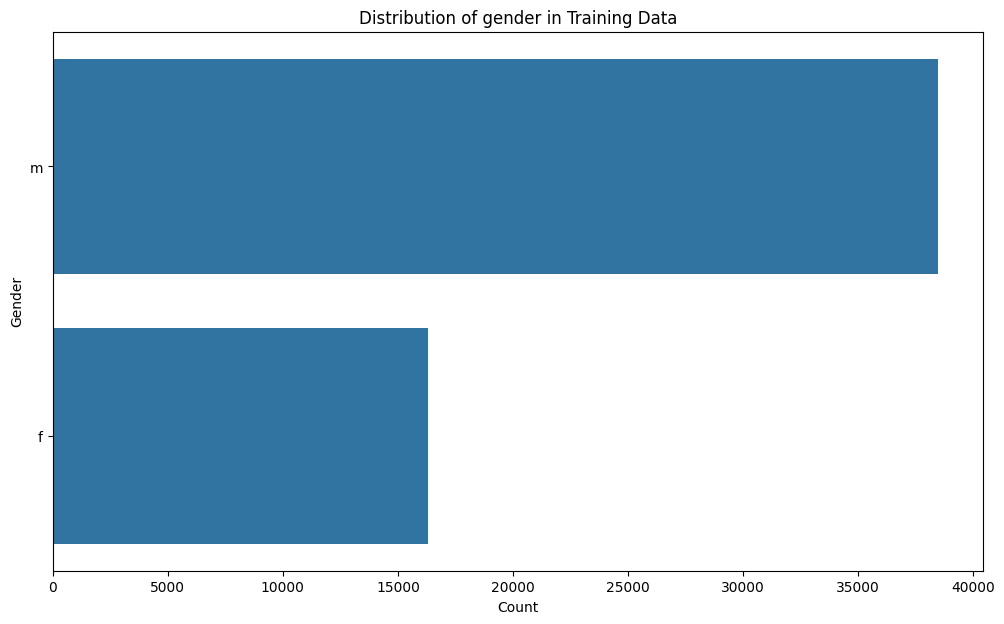

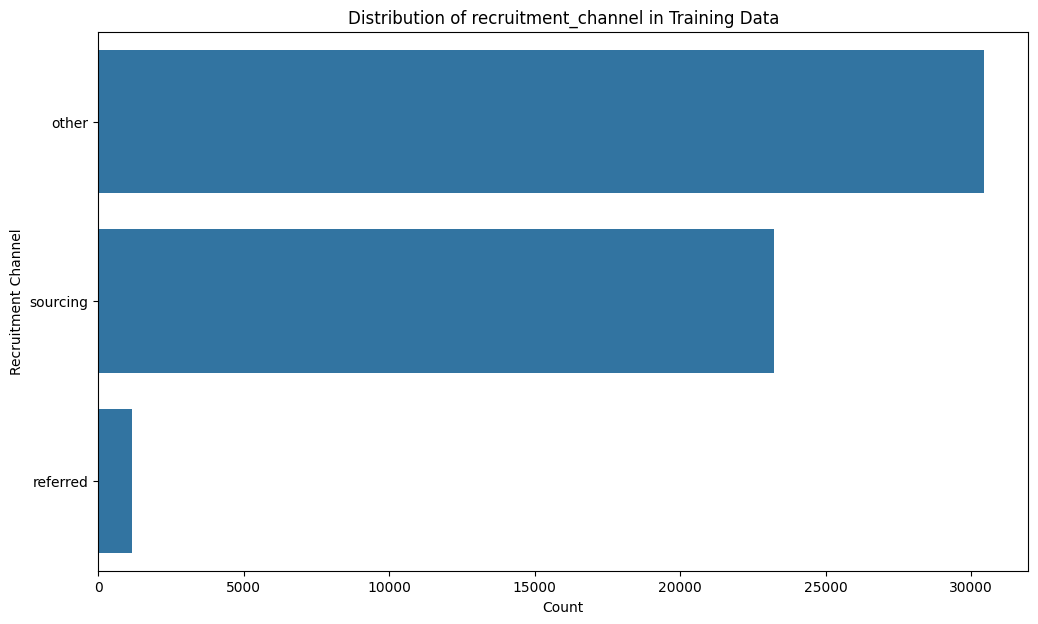

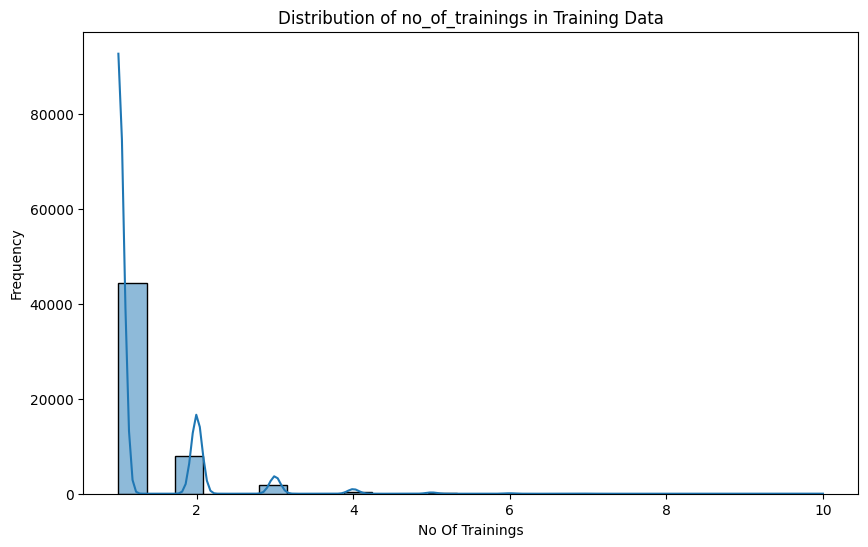

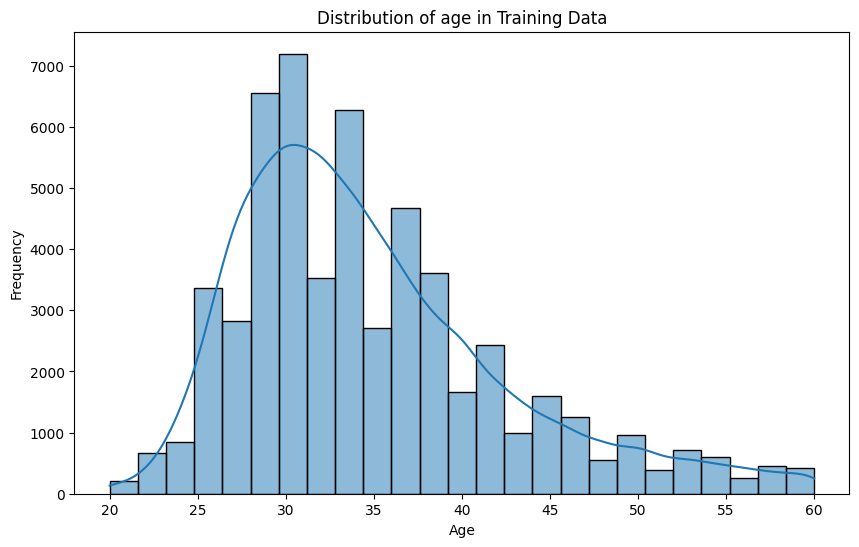

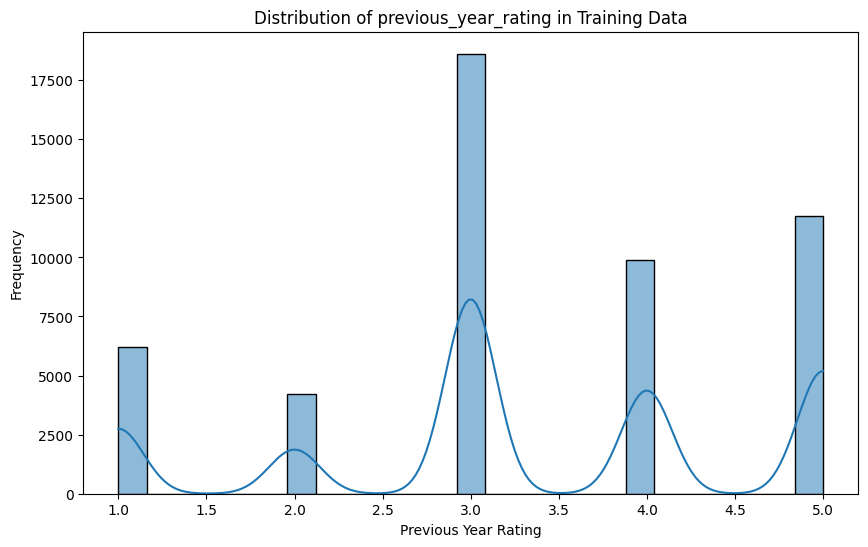

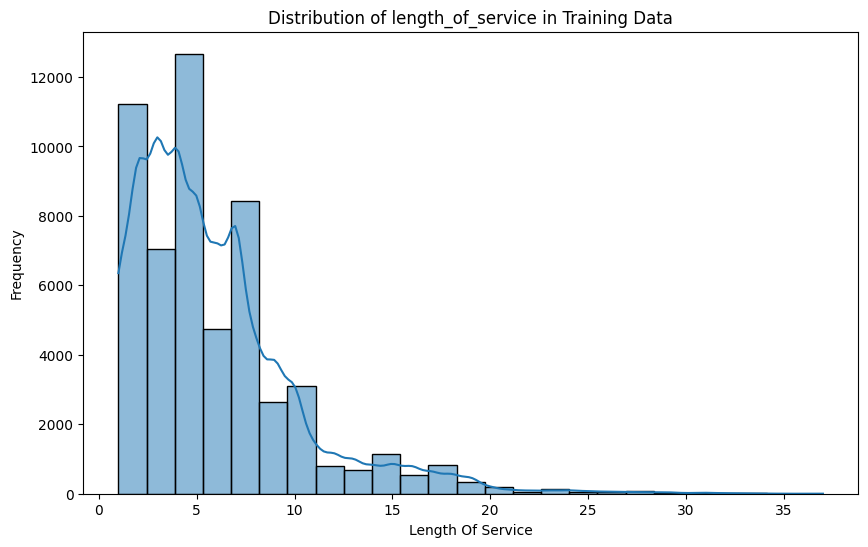

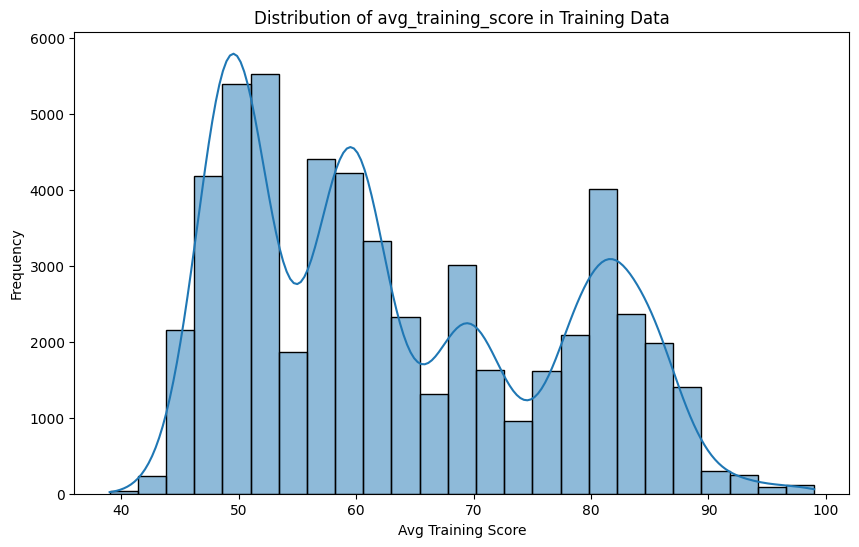

In [29]:

categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']


for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(y=feature, data=train_df, order = train_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.xlabel('Count')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()


for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], bins=25, kde=True)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()


In [30]:


train_processed_df = train_df.copy()


education_mode = train_processed_df['education'].mode()[0]
train_processed_df['education'].fillna(education_mode, inplace=True)
print(f"Filled missing 'education' values with mode: '{education_mode}'")



rating_median = train_processed_df['previous_year_rating'].median()
train_processed_df['previous_year_rating'].fillna(rating_median, inplace=True)
print(f"Filled missing 'previous_year_rating' values with median: {rating_median}")


print("\nMissing values after handling:")
print(train_processed_df.isnull().sum())


train_processed_df = pd.get_dummies(train_processed_df, columns=categorical_features, drop_first=True)
print("\nConverted categorical features to numerical format using one-hot encoding.")

print(train_processed_df.head())



--- Pre-processing Train Data ---
Filled missing 'education' values with mode: 'Bachelor's'
Filled missing 'previous_year_rating' values with median: 3.0

Missing values after handling:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Converted categorical features to numerical format using one-hot encoding.

Top 5 rows of the pre-processed training data:
   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0           

/tmp/ipython-input-311957242.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_processed_df['education'].fillna(education_mode, inplace=True)
/tmp/ipython-input-311957242.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [32]:
test_df=pd.read_csv('/content/test_2umaH9m.csv')
print(test_df.head)

<bound method NDFrame.head of        employee_id         department     region         education gender  \
0             8724         Technology  region_26        Bachelor's      m   
1            74430                 HR   region_4        Bachelor's      f   
2            72255  Sales & Marketing  region_13        Bachelor's      m   
3            38562        Procurement   region_2        Bachelor's      f   
4            64486            Finance  region_29        Bachelor's      m   
...            ...                ...        ...               ...    ...   
23485        53478              Legal   region_2   Below Secondary      m   
23486        25600         Technology  region_25        Bachelor's      m   
23487        45409                 HR  region_16        Bachelor's      f   
23488         1186        Procurement  region_31        Bachelor's      m   
23489         5973         Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  a

In [34]:


test_df.info()
print(test_df.describe())
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
        employee_id  no_of_trainings           age  previous_yea

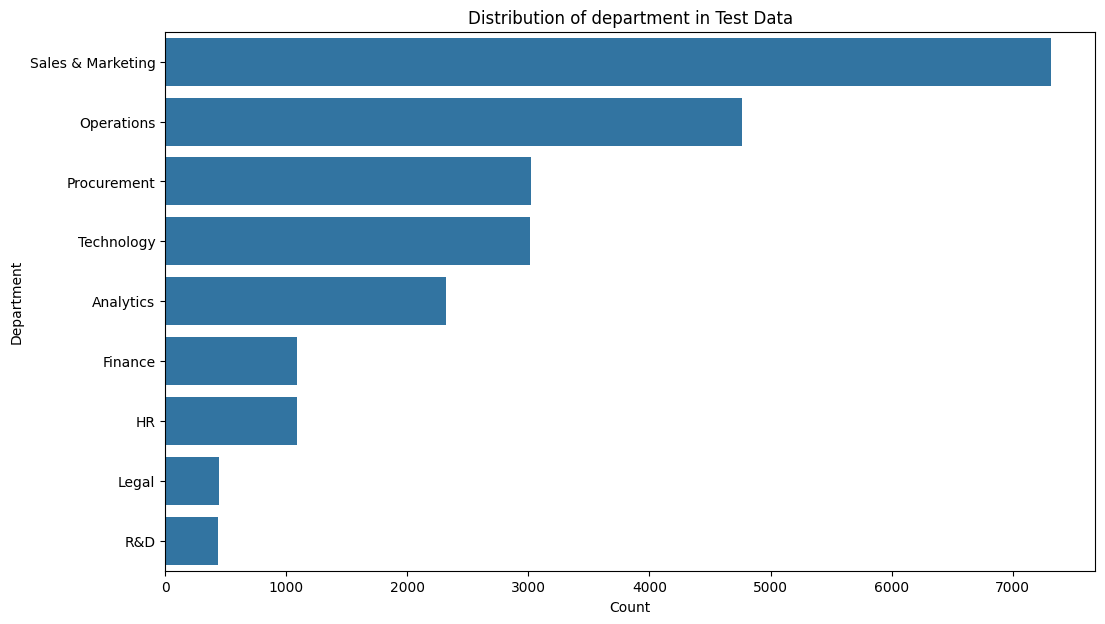

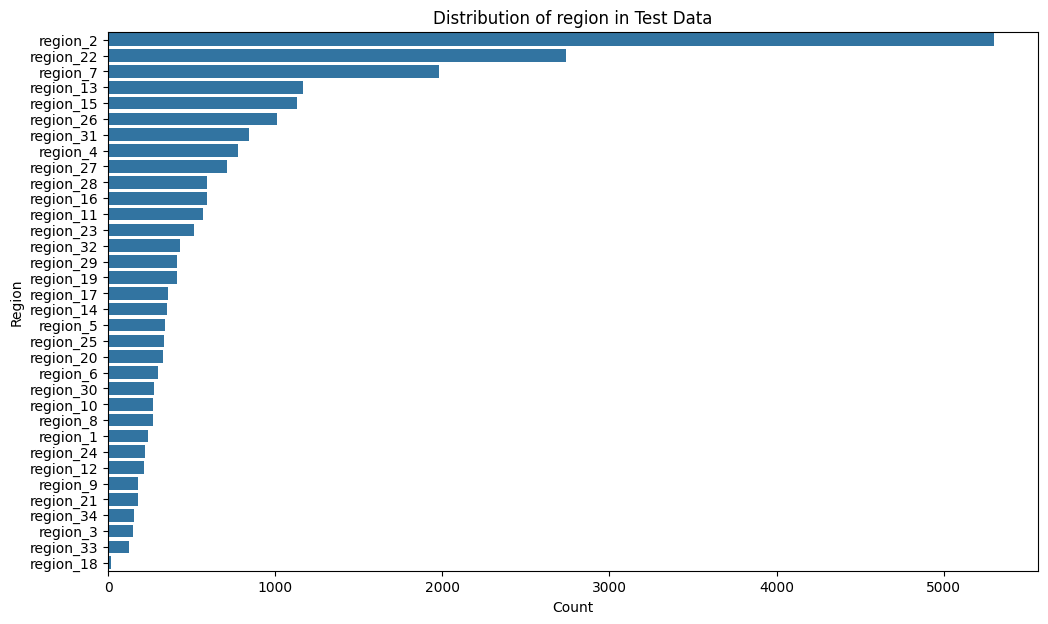

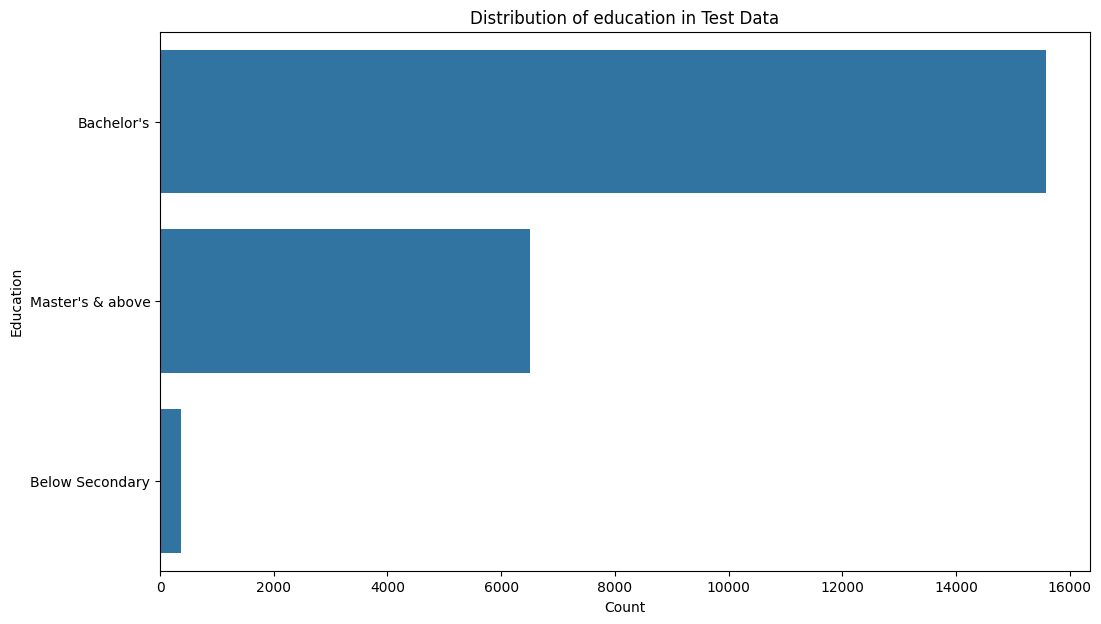

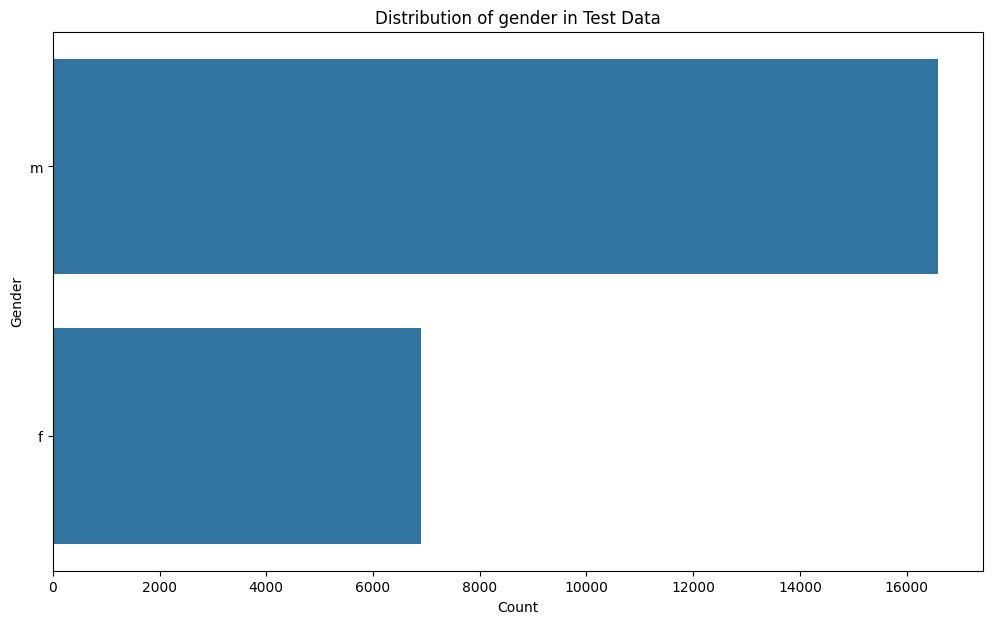

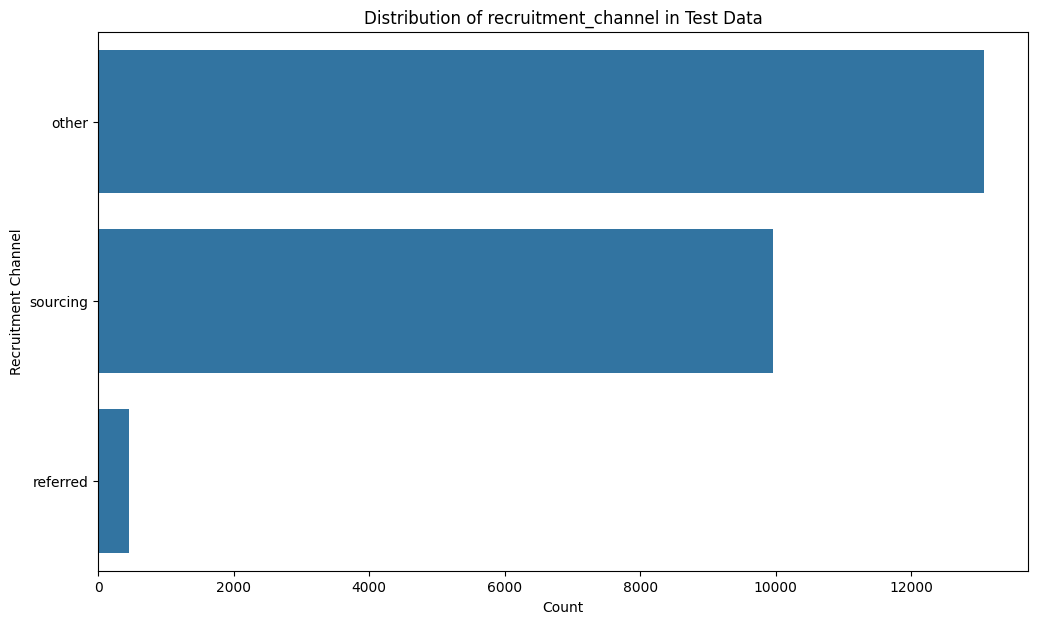

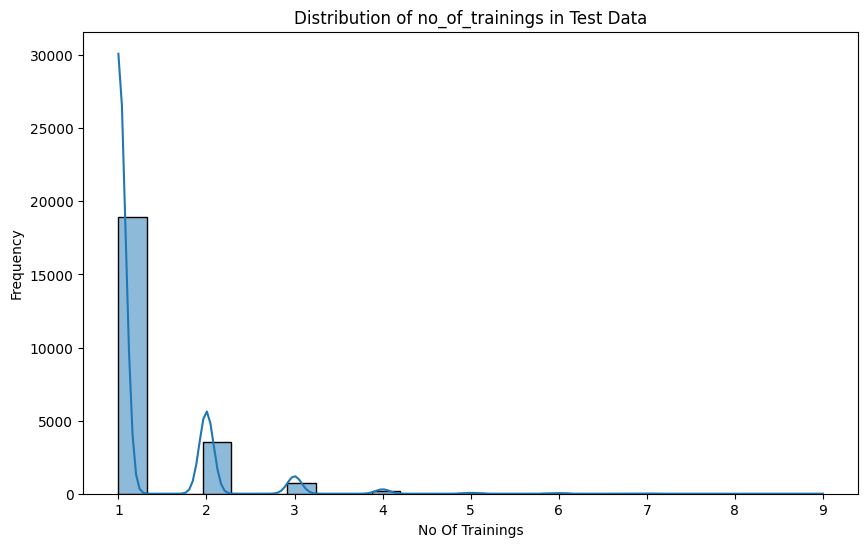

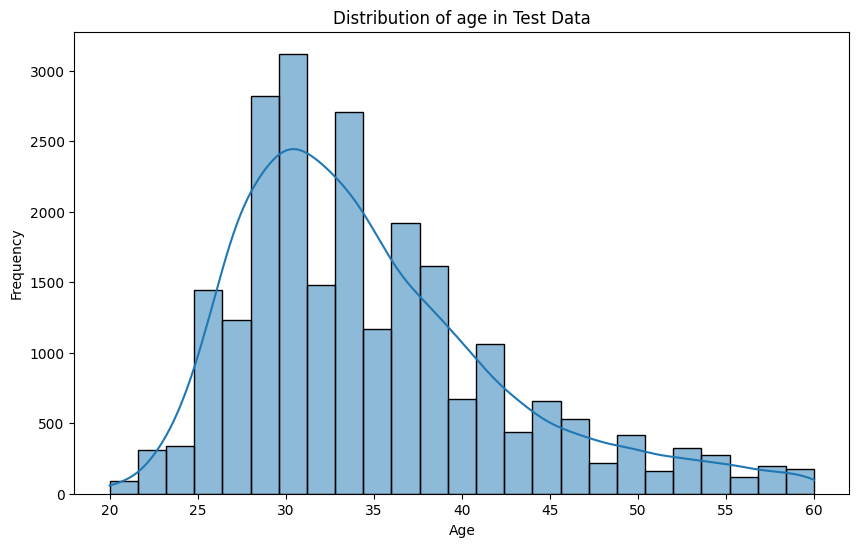

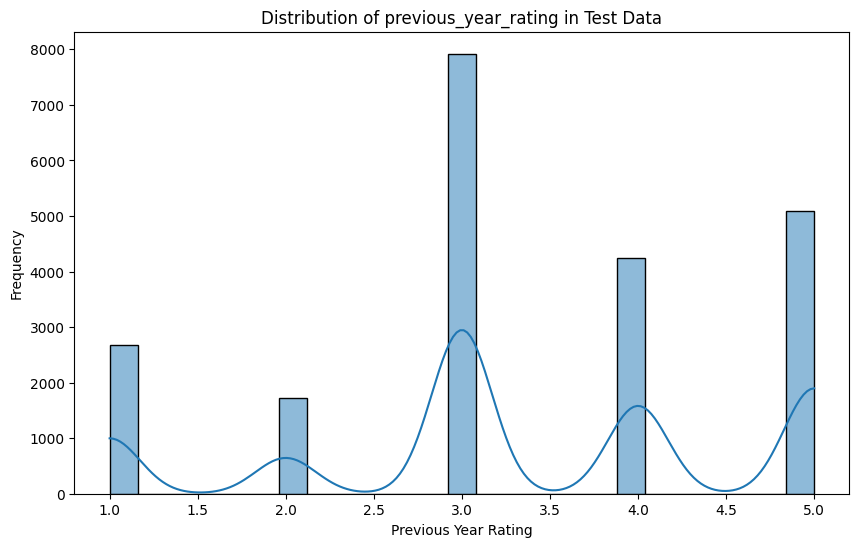

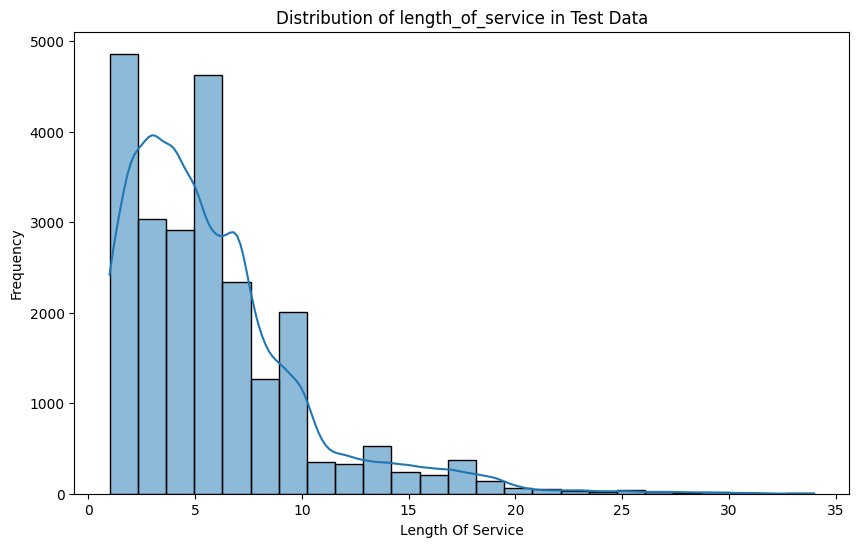

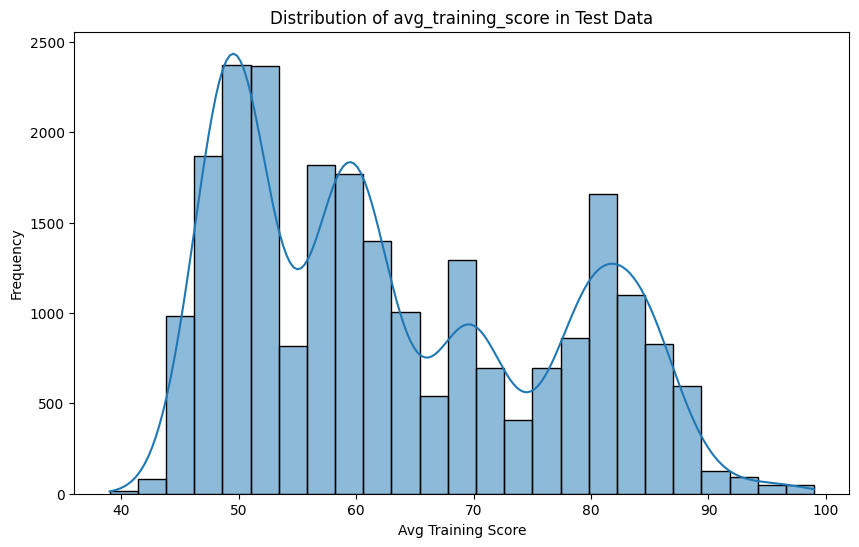

In [36]:

categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']


for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(y=feature, data=test_df, order = test_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} in Test Data')
    plt.xlabel('Count')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(test_df[feature], bins=25, kde=True)
    plt.title(f'Distribution of {feature} in Test Data')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.show()


In [37]:

test_processed_df = test_df.copy()

education_mode_test = test_processed_df['education'].mode()[0]
test_processed_df['education'].fillna(education_mode_test, inplace=True)
print(f"Filled missing 'education' values with mode: '{education_mode_test}'")

rating_median_test = test_processed_df['previous_year_rating'].median()
test_processed_df['previous_year_rating'].fillna(rating_median_test, inplace=True)
print(f"Filled missing 'previous_year_rating' values with median: {rating_median_test}")

print("\nMissing values in the test set after handling:")
print(test_processed_df.isnull().sum())

test_processed_df = pd.get_dummies(test_processed_df, columns=categorical_features, drop_first=True)
print("\nConverted categorical features to numerical format using one-hot encoding.")

print(test_processed_df.head())



Filled missing 'education' values with mode: 'Bachelor's'
Filled missing 'previous_year_rating' values with median: 3.0

Missing values in the test set after handling:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Converted categorical features to numerical format using one-hot encoding.
   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0         8724                1   24                   3.0                  1   
1        74430                1   31                   3.0                  5   
2        72255                1   31                   1.0                  4   
3        38562                3   31                   2.0                  9   


/tmp/ipython-input-1884076108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_processed_df['education'].fillna(education_mode_test, inplace=True)
/tmp/ipython-input-1884076108.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [38]:
from sklearn.preprocessing import StandardScaler

X = train_processed_df.drop('is_promoted', axis=1)
y = train_processed_df['is_promoted']

train_cols = X.columns
test_cols = test_processed_df.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_processed_df[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X[c] = 0


test_processed_df = test_processed_df[train_cols]

numerical_features_to_scale = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'employee_id']

scaler = StandardScaler()

X[numerical_features_to_scale] = scaler.fit_transform(X[numerical_features_to_scale])
test_processed_df[numerical_features_to_scale] = scaler.transform(test_processed_df[numerical_features_to_scale])

print("Columns aligned and features scaled successfully.")
print("\nScaled Training Data Head:")
print(X.head())

Columns aligned and features scaled successfully.

Scaled Training Data Head:
   employee_id  no_of_trainings       age  previous_year_rating  \
0     1.161858        -0.415276  0.025598              1.395766   
1     1.148709        -0.415276 -0.627135              1.395766   
2    -1.402741        -0.415276 -0.104948             -0.250651   
3    -1.622829         1.226063  0.547785             -1.897069   
4     0.431639        -0.415276  1.331064             -0.250651   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0           0.500460              1            0           -1.075931   
1          -0.437395              0            0           -0.253282   
2           0.265996              0            0           -1.001145   
3           0.969387              0            0           -1.001145   
4          -0.906322              0            0            0.718939   

   department_Finance  department_HR  ...  region_region_5  region_region_6  \
0      

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")

Training features shape: (43846, 54)
Validation features shape: (10962, 54)
Training target shape: (43846,)
Validation target shape: (10962,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report


lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)


f1_lr = f1_score(y_val, y_pred_lr)
print(f"F1 Score (Logistic Regression): {f1_lr:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_val, y_pred_lr))

F1 Score (Logistic Regression): 0.3739

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10028
           1       0.24      0.82      0.37       934

    accuracy                           0.77     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.92      0.77      0.81     10962



In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_val)

f1_rf = f1_score(y_val, y_pred_rf)
print(f"F1 Score (Random Forest): {f1_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_val, y_pred_rf))

F1 Score (Random Forest): 0.4235

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.93      0.27      0.42       934

    accuracy                           0.94     10962
   macro avg       0.93      0.64      0.69     10962
weighted avg       0.94      0.94      0.92     10962



In [46]:
print("Training the final Random Forest model on the entire training dataset...")


final_rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
final_rf_model.fit(X, y)


print("Making predictions on the competition test data...")
test_predictions = final_rf_model.predict(test_processed_df)

print("\nPredictions generated successfully.")
print(f"First 10 predictions: {test_predictions[:20]}")

Training the final Random Forest model on the entire training dataset...
Making predictions on the competition test data...

Predictions generated successfully.
First 10 predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:

sample_submission_df = pd.read_csv('/content/sample_submission_M0L0uXE.csv')


sample_submission_df['is_promoted'] = test_predictions

submission_filename = 'final_submission.csv'
sample_submission_df.to_csv(submission_filename, index=False)

print(f"Submission file '{submission_filename}' created successfully!")
print("\nHead of the submission file:")
print(sample_submission_df.head())

Submission file 'final_submission.csv' created successfully!

Head of the submission file:
   employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0
